# Pyber Rideshare Data Analysis

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np 

# Files to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


# Read the City and Ride Data
# Combine the data into a single dataset
# Display the data table for preview
# colors :  "Gold", "SkyBlue", "Coral"

In [2]:
# Read the City Data
city_data =pd.read_csv("data/city_data.csv", delimiter = ',')
city_data.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Read the Ride Data
ride_data =pd.read_csv("data/ride_data.csv", delimiter = ',')
ride_data.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
merge_df = ride_data.merge(city_data, on='city', how="outer")
# group by city 
cityride_data = merge_df.groupby("city")


In [5]:
#make a summary table of necessary data

summary = pd.DataFrame ({"Average Fare": cityride_data["fare"].mean().round(2),
                            "Total Rides": cityride_data["ride_id"].count(),
                            "Total Drivers":cityride_data["driver_count"].sum(),
#                             "City": cityride_data["city"].max(), 
                            "City Type": cityride_data["type"].max()})


summary.head()

,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
Amandaburgh,24.64,18,216,Urban
Barajasview,25.33,22,572,Urban
Barronchester,36.42,16,176,Suburban
Bethanyland,32.96,18,396,Suburban
Bradshawfurt,40.06,10,70,Rural


In [6]:
#Split out the City Types for use below 

urban =summary.loc[summary["City Type"] == "Urban"]

suburban = summary.loc[summary["City Type"] == "Suburban"]

rural = summary.loc[summary["City Type"] == "Rural"]


## Bubble Plot of Ride Sharing Data

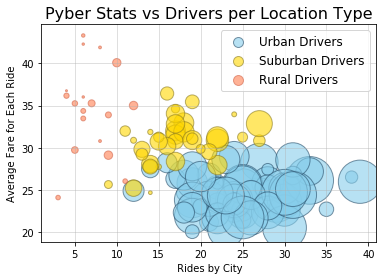

In [7]:

#build plots for city types
Urban = plt.scatter(urban["Total Rides"], urban["Average Fare"], s=urban["Total Drivers"], c="SkyBlue", alpha=.6, edgecolors="#274d69")
Suburban = plt.scatter(suburban["Total Rides"], suburban["Average Fare"], s=suburban["Total Drivers"], c="Gold", alpha=.6, edgecolors="#897a21")
Rural = plt.scatter(rural["Total Rides"], rural["Average Fare"], s=rural["Total Drivers"], c="Coral", alpha=.6, edgecolors="#d2664b")

#Incorporate the other graph properties
#labels
labels = ["Urban Drivers", "Suburban Drivers", "Rural Drivers"]
#grid as grey 
plt.grid(alpha=.5)
# Title and x/y labels
plt.title("Pyber Stats vs Drivers per Location Type", fontsize=16)
plt.xlabel(" Rides by City")
plt.ylabel("Average Fare for Each Ride")

# Legendary
legend = plt.legend(labels=labels, fontsize=12)
# make Legend items the same size 
for handle in legend.legendHandles:
    handle.set_sizes([100.0])
# Save Figure
plt.savefig("Images/pyber_stats_v_drivers.png")
plt.show()


## Total Fares by City Type

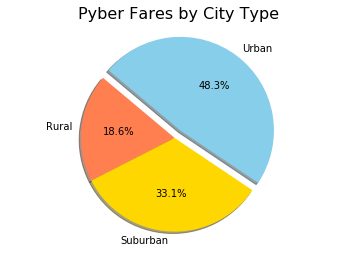

In [9]:
# Calculate Fare Percents
#totals from data above
u_tot = urban['Average Fare'].sum()
s_tot = suburban['Average Fare'].sum()
r_tot = rural['Average Fare'].sum()
#grand total
total = r_tot + u_tot + s_tot
#percentages
u_per = (u_tot/total) * 100
s_per = (s_tot/total) * 100
r_per = (r_tot/total) * 100


# Build Pie Chart
percents = [r_per, s_per, u_per]
labels= ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["Coral","Gold","SkyBlue"]
plt.pie(percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Pyber Fares by City Type",fontsize=16 )
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/fares_by_type.png")
# show our pie
plt.show()





## Total Rides by City Type

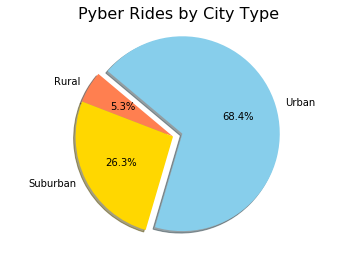

In [10]:
# Calculate Ride Percents
#totals from data above
u_tot = urban['Total Rides'].sum()
s_tot = suburban['Total Rides'].sum()
r_tot = rural['Total Rides'].sum()
#grand total
total = r_tot + u_tot + s_tot
#percentages
u_per = (u_tot/total) * 100
s_per = (s_tot/total) * 100
r_per = (r_tot/total) * 100

# Build Pie Chart
rides =[r_per, s_per, u_per]
labels= ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["Coral","Gold","SkyBlue"]
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Pyber Rides by City Type", fontsize=16)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/rides_by_type.png")
# show our pie
plt.show()





## Total Drivers by City Type

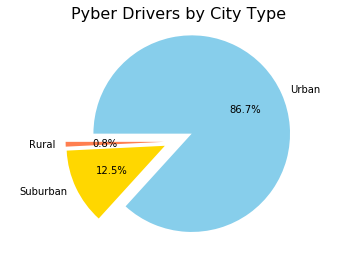

In [11]:
# Calculate Driver Percents
#totals from data above
u_tot = urban['Total Drivers'].sum()
s_tot = suburban['Total Drivers'].sum()
r_tot = rural['Total Drivers'].sum()
#grand total
total = r_tot + u_tot + s_tot
#percentages
u_per = (u_tot/total) * 100
s_per = (s_tot/total) * 100
r_per = (r_tot/total) * 100

# Build Pie Chart
drivers =[r_per, s_per, u_per]
labels= ["Rural", "Suburban", "Urban"]
explode = (0.1, 0.1, 0.2)
colors = ["Coral","Gold","SkyBlue"]
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Pyber Drivers by City Type", fontsize=16)
# Save an image of our chart and print the final product to the screen
plt.savefig("Images/drivers_by_type.png")
# show our pie
plt.show()




# Trends and Analysis

Pyber has three areas it serves:  Urban, Suburban and Rural.  Urban is by far the largest money maker, but I think Pyber could encourage growth in the other two areas as well. For example, Suburban areas yield 26.3% of Pyber's rides and 33% of Pyber's fares, but only account for 12% of Pyber's Drivers.  Pyber may want to consider ways to grow the Suburban segment by doing the following:  1. Encourage more drivers, as you can market this as a "goldilocks" job opportunity;  The suburbs do not have too many drivers, but they do have enough work and high enough fares to be enticing as a part-time option.  2. Implement a longer ride incentive program for the Suburban areas to increase total fare and possibly retain those drivers. 
If Pyber adds an incentive option for longer rides to and from the Suburbs, Rural areas, which  yeild the highest average fares, may see an uptick in business, and Pyber would see an increase in profits. I recommend some additional research on riders making longer journies between ride areas to best target where to trial. 